<a href="https://colab.research.google.com/github/Anand0111/Mini-Project/blob/master/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Using accuracy_score:-
 96.88542825361512
Report for Image Classification SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg      

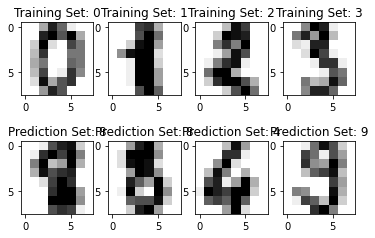

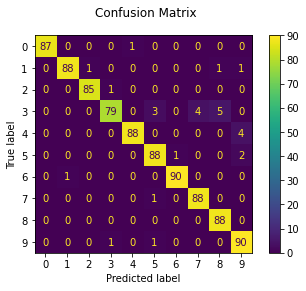

In [ ]:
#Import SVM,Matplotlib,model_selection from sklearn to split data
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


#Load load_digits() data set from sklearn
d1= datasets.load_digits()


#Print 1st 4 images by using subplot to split plot area 2*4
_, axes = plt.subplots(2, 4)
il= list(zip(d1.images, d1.target))
for r, (image, label) in zip(axes[0,:], il[:4]):
    r.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    r.set_title('Training Set: %i' % label)


#Reshape Your image
n_samples = len(d1.images)
data = d1.images.reshape((n_samples, -1))
cls = svm.SVC(gamma=0.001)


#Split the data set 
xtr,xte,ytr,yte = train_test_split(data, d1.target, test_size=0.5, shuffle=False)

#Apply SVM Algorithm to the data set (Train case)
cls.fit(xtr,ytr)

#Predict value for Test Case
pred= cls.predict(xte)

#Print The output image and classify
ip= list(zip(d1.images[n_samples //2:], pred))
for r, (image, prediction) in zip(axes[1,:], ip[:4]):
    r.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    r.set_title('Prediction Set: %i' % prediction)


#Measure Accuracy using accuracy score:-
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy Using accuracy_score:-\n",accuracy_score(pred,yte)*100)


#Measure Accuracy using confusion matrics
print("Report for Image Classification %s:\n%s\n"% (cls, metrics.classification_report(yte, pred)))
disp = metrics.plot_confusion_matrix(cls,xte,yte)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()